In [1]:
import os
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import json
import sys
sys.path.append("/Users/yufanxia/Documents/GitHub")
from perturbgene.data_utils import GeneTokenizer, read_h5ad_file
import scanpy as sc
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import networkx as nx

/Users/yufanxia/Documents/GitHub/perturbgene/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
age_label_mapping_10 = {'1-month-old human stage':"unknown",
 '1-year-old human stage':"unknown",
 '10-month-old human stage':"unknown",
 '10-year-old human stage':"10-20",
 '10th week post-fertilization human stage':"unknown",
 '11-month-old human stage':"unknown",
 '12-year-old human stage':"10-20",
 '12th week post-fertilization human stage':"unknown",
 '13th week post-fertilization human stage':"unknown",
 '14th week post-fertilization human stage':"unknown",
 '15-year-old human stage':"10-20",
 '15th week post-fertilization human stage':"unknown",
 '16-year-old human stage':"10-20",
 '16th week post-fertilization human stage':"unknown",
 '17-year-old human stage':"10-20",
 '17th week post-fertilization human stage':"unknown",
 '18th week post-fertilization human stage':"unknown",
 '19-year-old human stage':"10-20",
 '19th week post-fertilization human stage':"unknown",
 '2-5 year-old child stage':"unknown",
 '2-month-old human stage':"unknown",
 '2-year-old human stage':"unknown",
 '20-year-old human stage':"20-30",
 '20th week post-fertilization human stage':"unknown",
 '21-year-old human stage':"20-30",
 '22-year-old human stage':"20-30",
 '23-year-old human stage':"20-30",
 '24-year-old human stage':"20-30",
 '25-year-old human stage':"20-30",
 '25th week post-fertilization human stage':"unknown",
 '26-year-old human stage':"20-30",
 '27-year-old human stage':"20-30",
 '28-year-old human stage':"20-30",
 '29-year-old human stage':"20-30",
 '3-month-old human stage':"unknown",
 '3-year-old human stage':"unknown",
 '30-year-old human stage':"20-30",
 '31-year-old human stage':"30-40",
 '31st week post-fertilization human stage':"unknown",
 '32-year-old human stage':"30-40",
 '33-year-old human stage':"30-40",
 '34-year-old human stage':"30-40",
 '35-year-old human stage':"30-40",
 '36-year-old human stage':"30-40",
 '37-year-old human stage':"30-40",
 '38-year-old human stage':"30-40",
 '39-year-old human stage':"30-40",
 '4-month-old human stage':"unknown",
 '4-year-old human stage':"unknown",
 '40-year-old human stage':"40-50",
 '41-year-old human stage':"40-50",
 '42-year-old human stage':"40-50",
 '43-year-old human stage':"40-50",
 '44-year-old human stage':"40-50",
 '45-year-old human stage':"40-50",
 '46-year-old human stage':"40-50",
 '47-year-old human stage':"40-50",
 '48-year-old human stage':"40-50",
 '49-year-old human stage':"40-50",
 '5-year-old human stage':"unknown",
 '50-year-old human stage':"40-50",
 '51-year-old human stage':"50-60",
 '52-year-old human stage':"50-60",
 '53-year-old human stage':"50-60",
 '54-year-old human stage':"50-60",
 '55-year-old human stage':"50-60",
 '56-year-old human stage':"50-60",
 '57-year-old human stage':"50-60",
 '58-year-old human stage':"50-60",
 '59-year-old human stage':"50-60",
 '6-12 year-old child stage':"unknown",
 '6-month-old human stage':"unknown",
 '6-year-old human stage':"unknown",
 '60-year-old human stage':"60-70",
 '61-year-old human stage':"60-70",
 '62-year-old human stage':"60-70",
 '63-year-old human stage':"60-70",
 '64-year-old human stage':"60-70",
 '65-year-old human stage':"60-70",
 '66-year-old human stage':"60-70",
 '67-year-old human stage':"60-70",
 '68-year-old human stage':"60-70",
 '69-year-old human stage':"60-70",
 '7-month-old human stage':"unknown",
 '7-year-old human stage':"unknown",
 '70-year-old human stage':"60-70",
 '71-year-old human stage':"70-80",
 '72-year-old human stage':"70-80",
 '73-year-old human stage':"70-80",
 '74-year-old human stage':"70-80",
 '75-year-old human stage':"70-80",
 '76-year-old human stage':"70-80",
 '77-year-old human stage':"70-80",
 '78-year-old human stage':"70-80",
 '79-year-old human stage':"70-80",
 '8-year-old human stage':"unknown",
 '80 year-old and over human stage':">80",
 '80-year-old human stage':">80",
 '81-year-old human stage':">80",
 '82-year-old human stage':">80",
 '83-year-old human stage':">80",
 '84-year-old human stage':">80",
 '85-year-old human stage':">80",
 '86-year-old human stage':">80",
 '87-year-old human stage':">80",
 '88-year-old human stage':">80",
 '89-year-old human stage':">80",
 '9-month-old human stage':"unknown",
 '9-year-old human stage':"unknown",
 '90-year-old human stage':">80",
 '92-year-old human stage':">80",
 '9th week post-fertilization human stage':"unknown",
 'Carnegie stage 17':"unknown",
 'Carnegie stage 18':"unknown",
 'Carnegie stage 20':"unknown",
 'Carnegie stage 22':"unknown",
 'Carnegie stage 23':"unknown",
 'adolescent stage':"unknown",
 'eighth LMP month human stage':"unknown",
 'eighth decade human stage':">80",
 'embryonic human stage':"unknown",
 'fifth LMP month human stage':"unknown",
 'fifth decade human stage':"50-60",
 'fourth decade human stage':"40-50",
 'human adult stage':"unknown",
 'human aged stage':"unknown",
 'infant stage':"unknown",
 'mature stage':"unknown",
 'newborn human stage':"unknown",
 'ninth decade human stage':">80",
 'organogenesis stage':"unknown",
 'seventh decade human stage':"70-80",
 'sixth decade human stage':"60-70",
 'third decade human stage':"30-40",
 'unknown':"unknown",
 'young adult stage':"unknown"}

In [3]:
adata = sc.read_h5ad("/Users/yufanxia/Downloads/chunk3562_processed3.h5ad")
adata.obs["age_group"] = adata.obs["development_stage"].map(age_label_mapping_10).to_list()
adata

/Users/yufanxia/Documents/GitHub/perturbgene/venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 10000 × 58604
    obs: 'soma_joinid_column', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'batch', 'ZBED1_embedding_status', 'TRAF5_embedding_status', 'GSK3A_embedding_status', 'FBXL19_embedding_status', 'RBX1_embedding_status', 'FBXO7_embedding_status', 'CUL1_embedding_status', 'PINK1_embedding_status', 'PARK7_embedding_status', 'GIGYF2_embedding_status', 'ATP13A2_embedding_status', 'PRKN_embedding_status', 'PLA2G6_embedding_status', 'SKP1_embedding_status', 'LONP2_embedding_status', 'CNTNAP2_embe

In [4]:
gene_names = [key.replace('_embeddings', '') for key in adata.obsm.keys() if "_embeddings" in key and key.startswith("IG")]
valid_embeddings = {}

# Filter cells with valid embeddings for each gene
for gene in gene_names:
    # Filter cells where the gene embedding is present
    gene_status = f"{gene}_embedding_status"
    valid_cells = adata.obs[gene_status] == "present"
    
    # Store valid embeddings
    valid_embeddings[gene] = adata.obsm[f"{gene}_embeddings"][valid_cells]

# Initialize a matrix to store cosine similarities
similarity_matrix = np.zeros((len(gene_names), len(gene_names)))

# Compute cosine similarity between gene pairs
for i, gene1 in enumerate(gene_names):
    for j, gene2 in enumerate(gene_names):
        if i <= j:
            # Get the valid embeddings for gene1 and gene2
            embeddings_gene1 = valid_embeddings[gene1]
            embeddings_gene2 = valid_embeddings[gene2]
            
            # Compute cosine similarity
            cos_sim = cosine_similarity(embeddings_gene1, embeddings_gene2)
            
            # Get the mean cosine similarity for the pair
            mean_cos_sim = np.mean(cos_sim)
            
            # Store in the matrix (symmetrical)
            similarity_matrix[i, j] = mean_cos_sim
            similarity_matrix[j, i] = mean_cos_sim

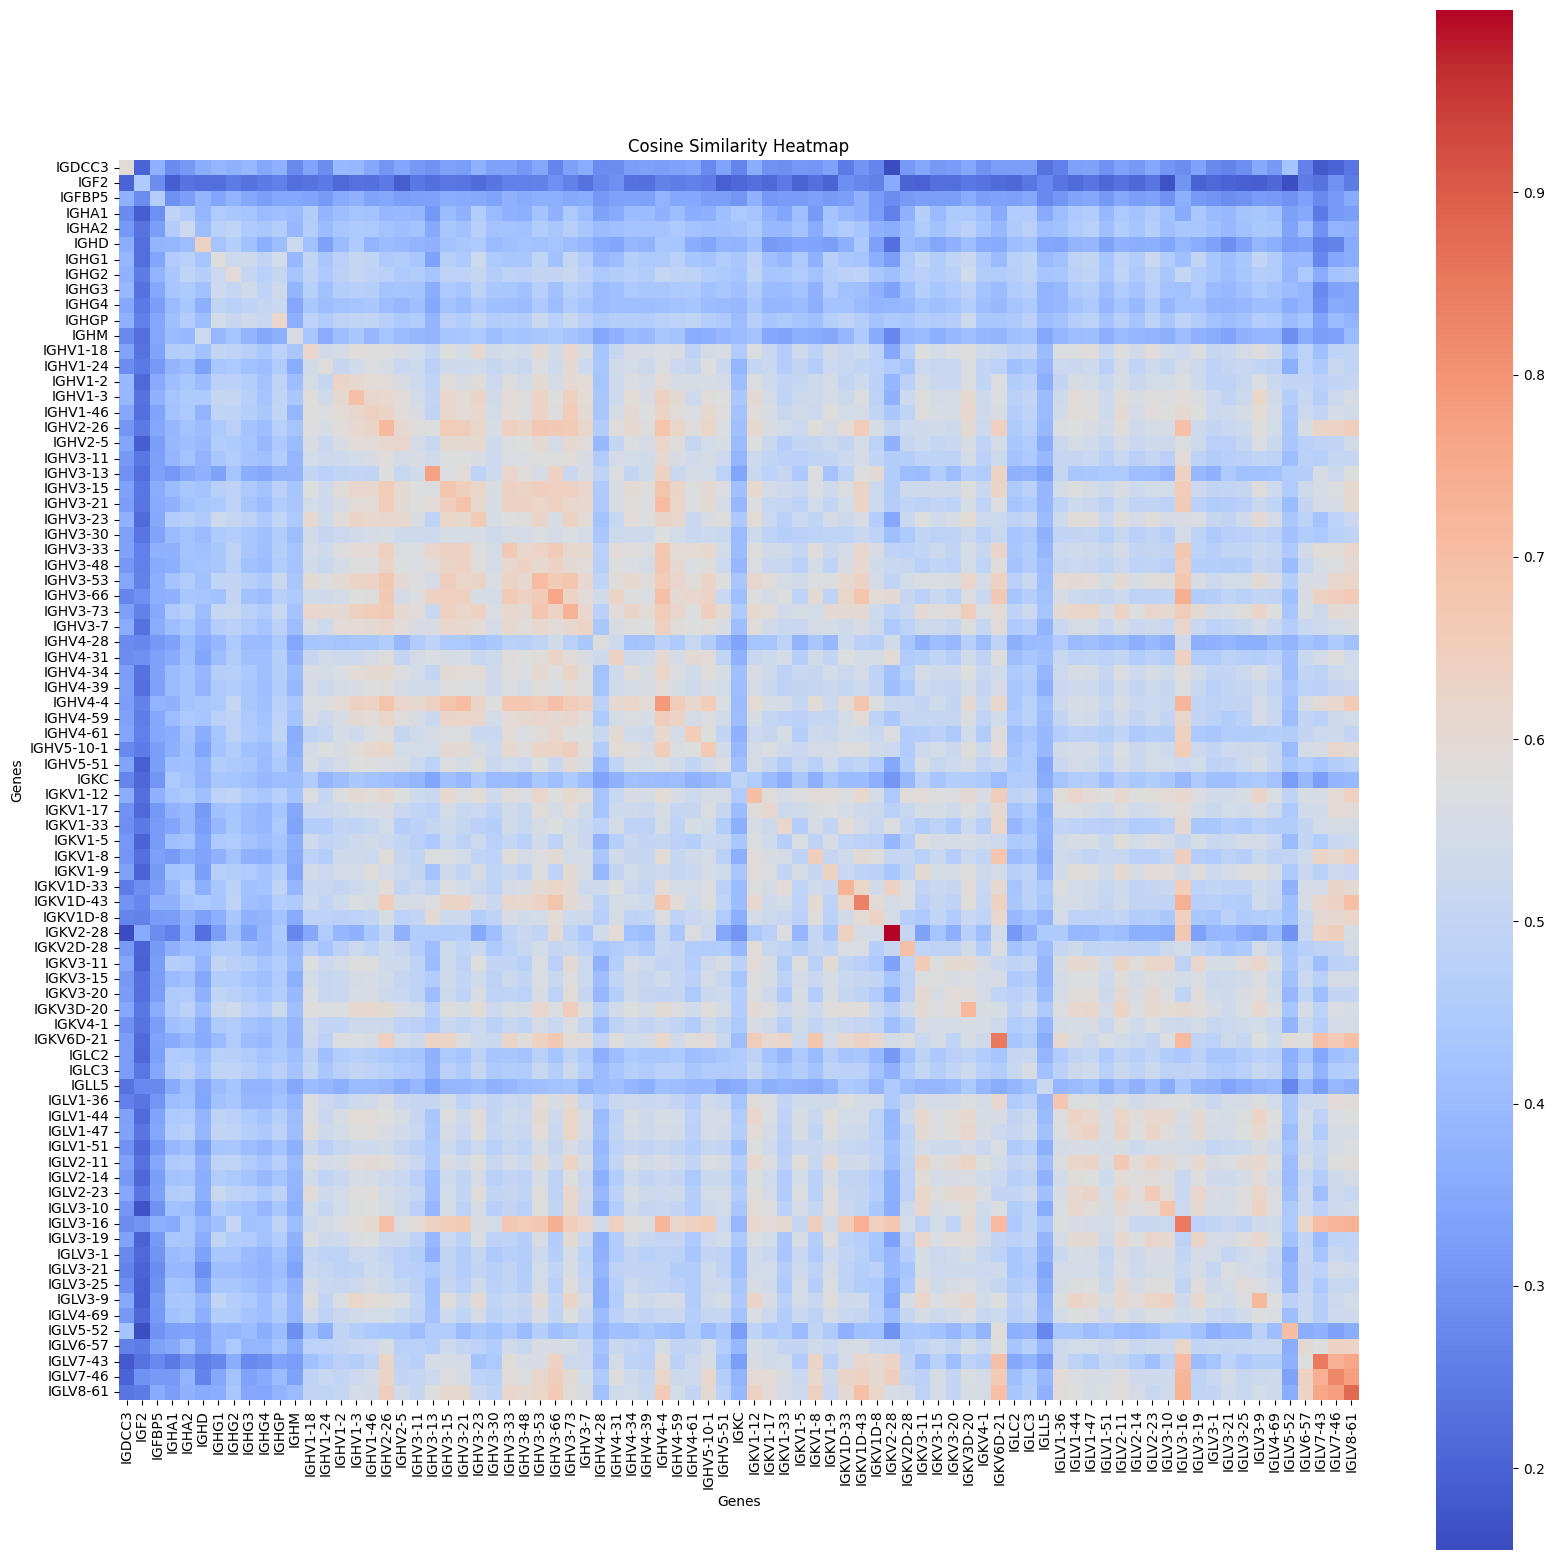

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(similarity_matrix,
            xticklabels=gene_names, 
            yticklabels=gene_names, 
            cmap='coolwarm', 
            square=True)

# Set the title and labels
plt.title("Cosine Similarity Heatmap")
plt.xlabel("Genes")
plt.ylabel("Genes")

# Show the plot
plt.show()

<Figure size 4000x4000 with 0 Axes>

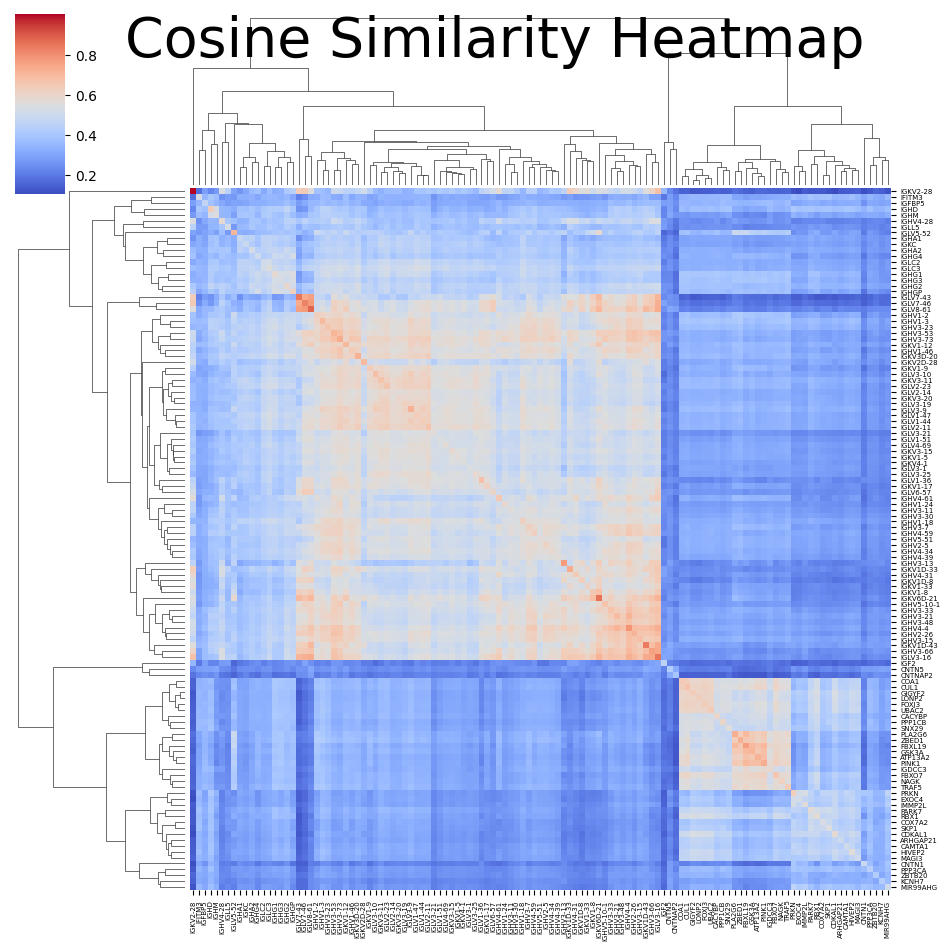

In [22]:
plt.figure(figsize=(40, 40))
g = sns.clustermap(similarity_matrix, 
                    xticklabels=gene_names, 
                    yticklabels=gene_names, 
                    cmap='coolwarm', 
                    square=True)

# Set the title
g.fig.suptitle("Cosine Similarity Heatmap", fontsize=40)

# Adjust the sizes of the x and y tick labels
for label in g.ax_heatmap.get_xticklabels():
    label.set_size(5)  # Set the size for x-axis labels

for label in g.ax_heatmap.get_yticklabels():
    label.set_size(5)  # Set the size for y-axis labels

# Show the plot
plt.show()

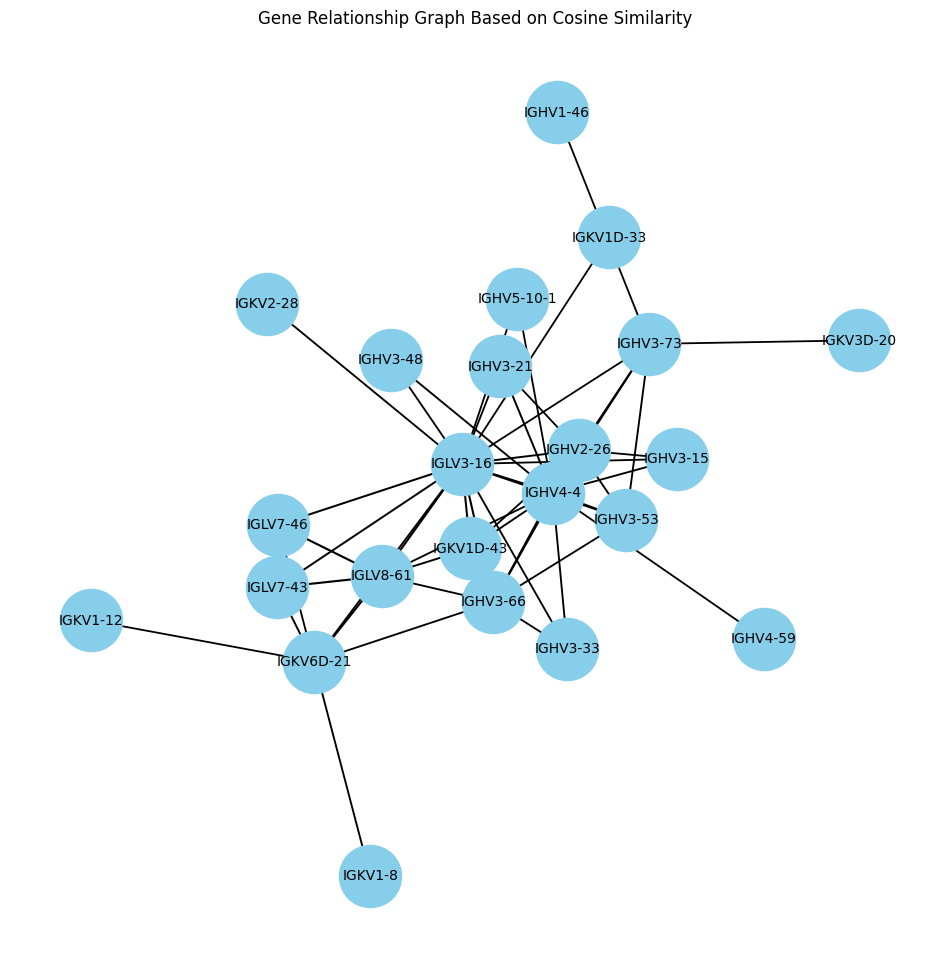

In [33]:
threshold = 0.65
G = nx.Graph()
G.add_nodes_from([gene for gene in gene_names])

# Add edges based on the similarity matrix
for i, gene1 in enumerate(gene_names):
    for j, gene2 in enumerate(gene_names):
        if i != j and similarity_matrix[i, j] >= threshold:
            G.add_edge(gene1, gene2, weight=similarity_matrix[i, j])

# Remove unconnected nodes
connected_nodes = [node for node in G.nodes() if G.degree(node) > 0]
G_connected = G.subgraph(connected_nodes)

# Create a layout for the nodes with adjusted parameters
pos = nx.spring_layout(G_connected, seed=42, k=0.5)  # Increase k for more spacing

# Increase the figure size
plt.figure(figsize=(12, 12))  # Change the size as needed

# Draw the nodes and edges
nx.draw_networkx_nodes(G_connected, pos, node_color='skyblue', node_size=2000)
edges = G_connected.edges(data=True)
nx.draw_networkx_edges(
    G_connected, pos, edgelist=[(u, v) for u, v, d in edges], 
    width=[d['weight'] * 2 for u, v, d in edges]
)

# Draw the labels
nx.draw_networkx_labels(G_connected, pos, font_size=10, font_color='black')

plt.title("Gene Relationship Graph Based on Cosine Similarity")
plt.axis('off')  # Turn off the axis
plt.show()


In [5]:
adata

AnnData object with n_obs × n_vars = 10000 × 58604
    obs: 'soma_joinid_column', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars', 'batch', 'ZBED1_embedding_status', 'TRAF5_embedding_status', 'GSK3A_embedding_status', 'FBXL19_embedding_status', 'RBX1_embedding_status', 'FBXO7_embedding_status', 'CUL1_embedding_status', 'PINK1_embedding_status', 'PARK7_embedding_status', 'GIGYF2_embedding_status', 'ATP13A2_embedding_status', 'PRKN_embedding_status', 'PLA2G6_embedding_status', 'SKP1_embedding_status', 'LONP2_embedding_status', 'CNTNAP2_embe

In [34]:
len(common_genes)

31

In [33]:
len(gene_names)

81

In [32]:
age_groups = ["10-20", "40-50", "70-80"]
filtered_adata = adata[(adata.obs['age_group'].isin(age_groups)) & (adata.obs["disease"] == "normal")]
expressed_genes = filtered_adata[:,(filtered_adata.X.toarray() > 0.1).sum(axis=0) > 0].var["feature_name"]
common_genes = np.intersect1d(gene_names, expressed_genes)
print("Genes found in the specified age groups:", common_genes)

Genes found in the specified age groups: ['IGDCC3' 'IGFBP5' 'IGHA1' 'IGHA2' 'IGHD' 'IGHG1' 'IGHG2' 'IGHG3' 'IGHM'
 'IGHV1-18' 'IGHV1-2' 'IGHV3-23' 'IGHV3-30' 'IGHV4-34' 'IGHV4-59' 'IGKC'
 'IGKV1-17' 'IGKV1-33' 'IGKV1-5' 'IGKV3-11' 'IGKV3-15' 'IGKV3-20' 'IGLC2'
 'IGLC3' 'IGLL5' 'IGLV1-44' 'IGLV2-14' 'IGLV3-1' 'IGLV3-21' 'IGLV4-69'
 'IGLV6-57']


In [54]:
# Initialize a dictionary to store valid embeddings for each age group
valid_embeddings_by_age_group = {}

common_genes = ["IGDCC3","IGHA1","IGLC2","IGLC3","IGLV1-44"]
# Filter cells with valid embeddings for each gene and group them by age group
for age_group in ["10-20","40-50","70-80"]:
    valid_embeddings_by_age_group[age_group] = {}
    for gene in common_genes:
        # Filter cells where the gene embedding is present and belongs to the current age group
        gene_status = f"{gene}_embedding_status"
        valid_cells = (adata.obs[gene_status] == "present") & (adata.obs['age_group'] == age_group) & (adata.obs["disease"] == "normal")
        
        # Store valid embeddings for the current age group
        valid_embeddings_by_age_group[age_group][gene] = adata.obsm[f"{gene}_embeddings"][valid_cells]

# Initialize a dictionary to store similarity matrices for each age group
similarity_matrices = {}

# Compute cosine similarity between gene pairs for each age group
for age_group, valid_embeddings in valid_embeddings_by_age_group.items():
    similarity_matrix = np.zeros((len(common_genes), len(common_genes)))
    
    for i, gene1 in enumerate(common_genes):
        for j, gene2 in enumerate(common_genes):
            if i <= j:
                # Get the valid embeddings for gene1 and gene2
                embeddings_gene1 = valid_embeddings.get(gene1, np.array([]))
                embeddings_gene2 = valid_embeddings.get(gene2, np.array([]))
                
                if embeddings_gene1.size > 0 and embeddings_gene2.size > 0:  # Check if both embeddings exist
                    # Compute cosine similarity
                    cos_sim = cosine_similarity(embeddings_gene1, embeddings_gene2)
                    
                    # Get the mean cosine similarity for the pair
                    mean_cos_sim = np.mean(cos_sim)
                    
                    # Store in the matrix (symmetrical)
                    similarity_matrix[i, j] = mean_cos_sim
                    similarity_matrix[j, i] = mean_cos_sim

    # Store the similarity matrix for the current age group
    similarity_matrices[age_group] = similarity_matrix


In [55]:
similarity_matrices["10-20"].shape

(5, 5)

In [37]:
def plot_network(similarity_matrix, gene_names = gene_names, threshold = 0.65, title =None):
    G = nx.Graph()
    G.add_nodes_from([gene for gene in gene_names])

    # Add edges based on the similarity matrix
    for i, gene1 in enumerate(gene_names):
        for j, gene2 in enumerate(gene_names):
            if i != j and similarity_matrix[i, j] >= threshold:
                G.add_edge(gene1, gene2, weight=similarity_matrix[i, j])

    # Remove unconnected nodes
    connected_nodes = [node for node in G.nodes() if G.degree(node) > 0]
    G_connected = G.subgraph(connected_nodes)

    # Create a layout for the nodes with adjusted parameters
    pos = nx.spring_layout(G_connected, seed=42, k=0.5)  # Increase k for more spacing

    # Increase the figure size
    plt.figure(figsize=(12, 12))  # Change the size as needed

    # Draw the nodes and edges
    nx.draw_networkx_nodes(G_connected, pos, node_color='skyblue', node_size=2000)
    edges = G_connected.edges(data=True)
    nx.draw_networkx_edges(
        G_connected, pos, edgelist=[(u, v) for u, v, d in edges], 
        width=[d['weight'] * 2 for u, v, d in edges]
    )

    # Draw the labels
    nx.draw_networkx_labels(G_connected, pos, font_size=10, font_color='black')
    if title:
        plt.title(title)
    else:
        plt.title("Gene Relationship Graph Based on Cosine Similarity")
    plt.axis('off')  # Turn off the axis
    plt.show()


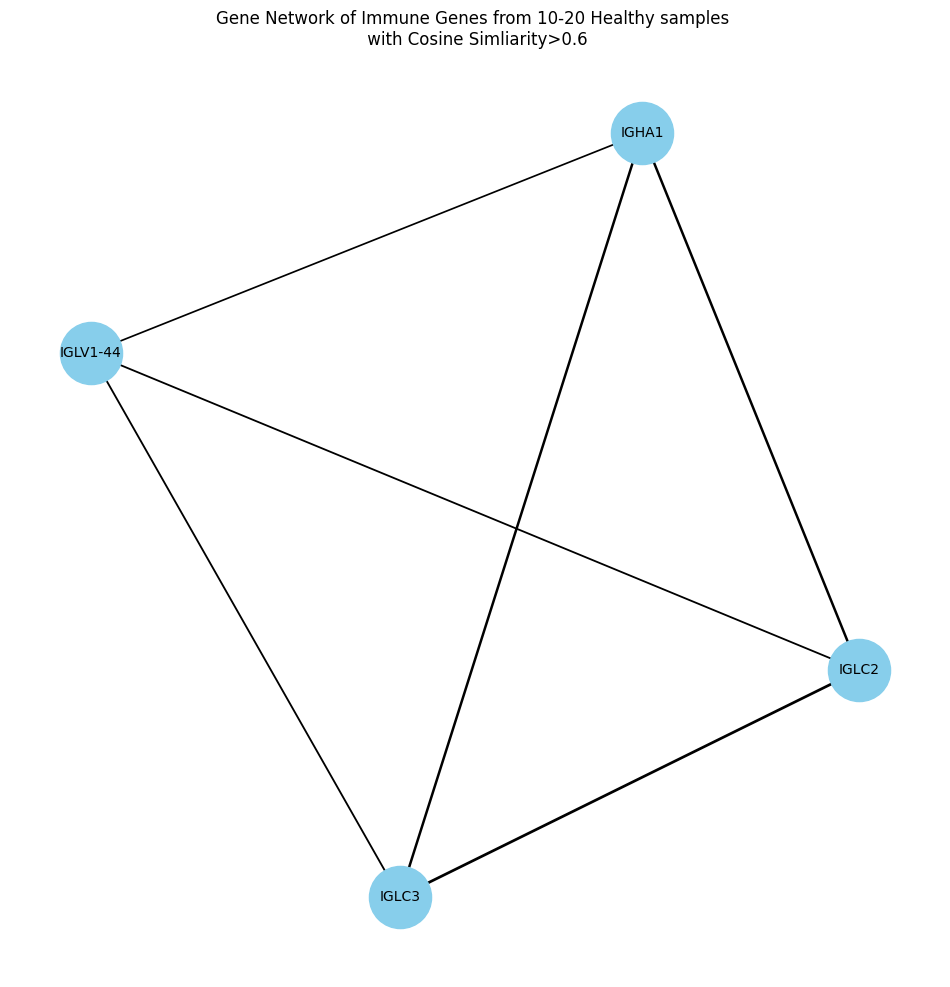

In [61]:
plot_network(similarity_matrices["10-20"],gene_names=["IGDCC3","IGHA1","IGLC2","IGLC3","IGLV1-44"], threshold=0.5, title="Gene Network of Immune Genes from 10-20 Healthy samples \n with Cosine Simliarity>0.6")

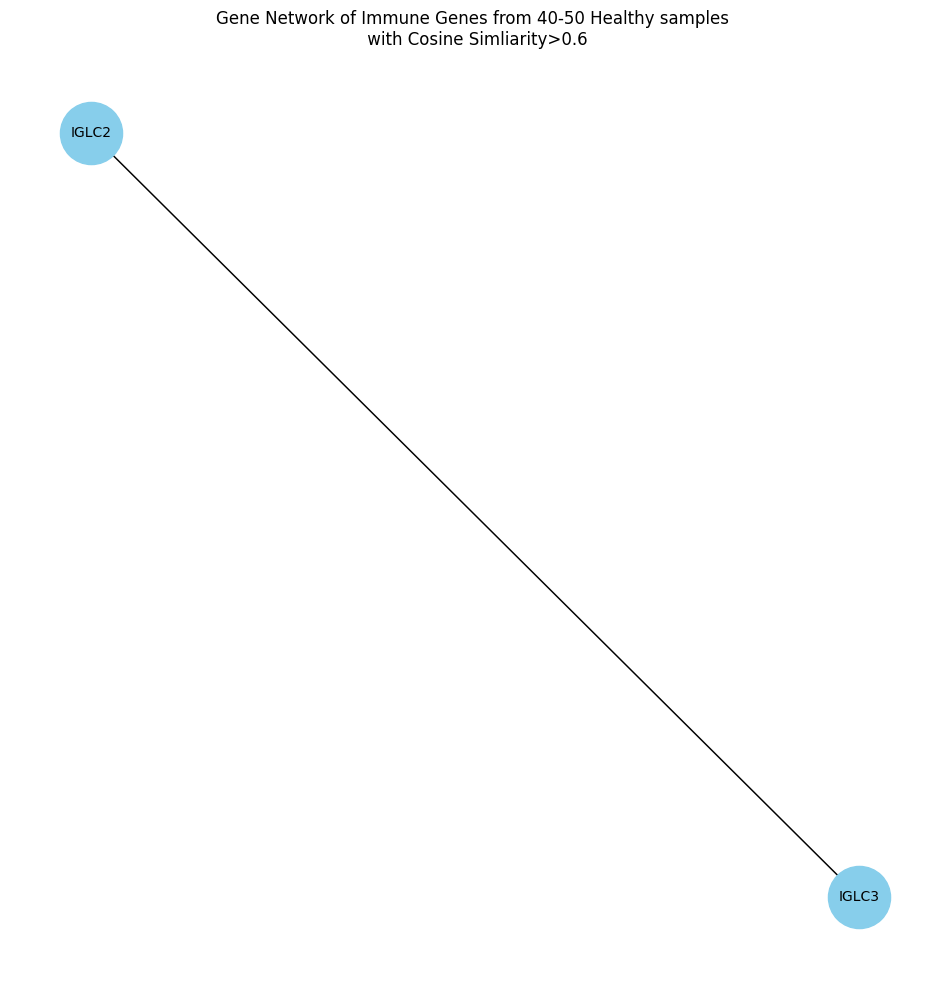

In [60]:
plot_network(similarity_matrices["40-50"],gene_names=["IGDCC3","IGHA1","IGLC2","IGLC3","IGLV1-44"], threshold=0.5, title="Gene Network of Immune Genes from 40-50 Healthy samples \n with Cosine Simliarity>0.6")

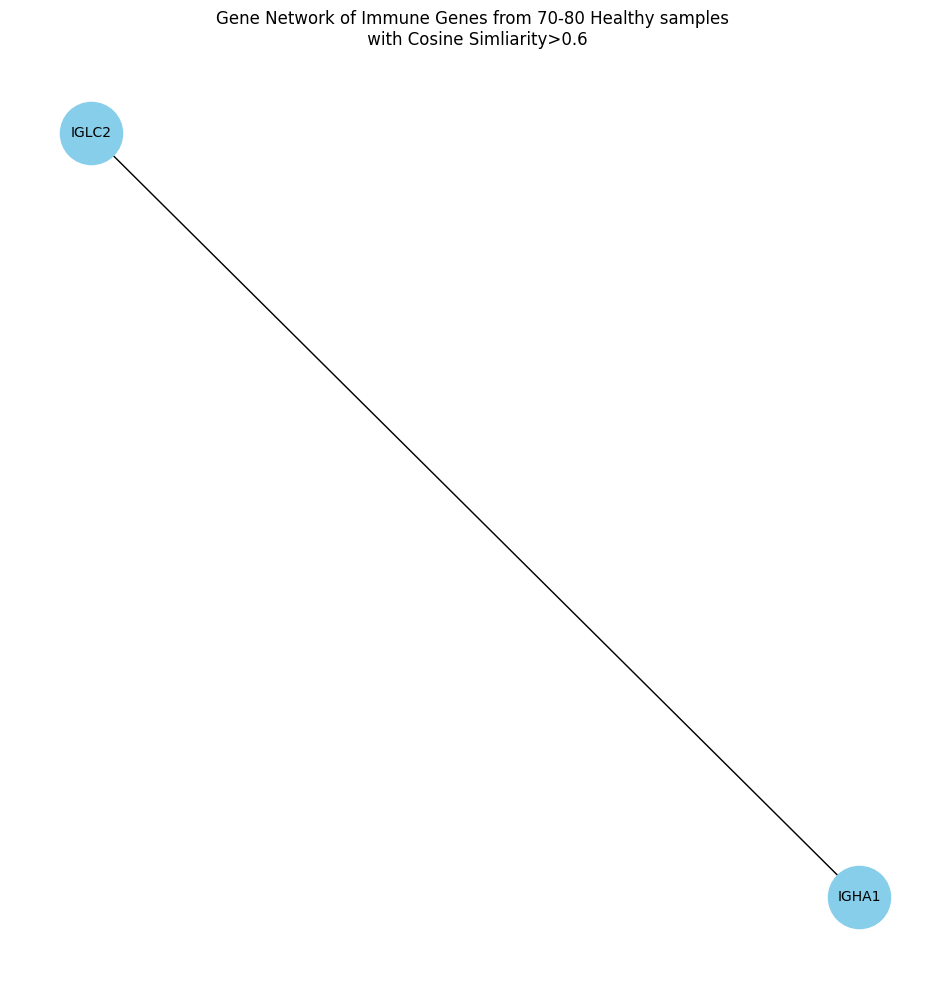

In [63]:
plot_network(similarity_matrices["70-80"],gene_names=["IGDCC3","IGHA1","IGLC2","IGLC3","IGLV1-44"], threshold=0.5, title="Gene Network of Immune Genes from 70-80 Healthy samples \n with Cosine Simliarity>0.6")